In [3]:
%matplotlib inline

# scientific packages
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta
from scipy import stats
sns.set();

In [4]:
test_df = pd.read_csv('C:\\Users\\krish\\Downloads\\takehome challenge dataset\\Translation_Test\\test_table.csv')
test_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
len(test_df.user_id)

453321

In [6]:
#length - List unique values in a DataFrame column
len(pd.unique(test_df.user_id.ravel()))

453321

In [7]:
user_df = pd.read_csv('C:\\Users\\krish\\Downloads\\takehome challenge dataset\\Translation_Test\\user_table.csv')
user_df.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [8]:
#length - List unique values in a DataFrame column
len(pd.unique(user_df.user_id.ravel()))

452867

In [9]:
df = pd.merge(left=test_df,right=user_df, left_on='user_id', right_on='user_id')
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [10]:
#length - List unique values in a DataFrame column
#len(pd.unique(df.user_id.ravel()))

len(df['user_id'].unique())

452867

In [11]:
# left outer join since test_df has more ids than user_df
left_outer_df = pd.merge(left=test_df,right=user_df, how='left',left_on='user_id', right_on='user_id')
left_outer_df.head()
#length - List unique values in a DataFrame column
len(pd.unique(left_outer_df.user_id.ravel()))

453321

In [12]:
user_df.groupby("country").agg({"user_id": pd.Series.nunique})

,user_id
country,
Argentina,46733
Bolivia,11124
Chile,19737
Colombia,54060
Costa Rica,5309
Ecuador,15895
El Salvador,8175
Guatemala,15125
Honduras,8568


In [13]:
user_df.groupby("sex").agg({"user_id": pd.Series.nunique})

,user_id
sex,
F,188382
M,264485


In [14]:
len(test_df[~test_df.isin(user_df).dropna()])

453321

In [15]:
len(user_df[~user_df.isin(test_df).dropna()])

452867

In [16]:
left_outer_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [17]:
uid_not_in_user_df = left_outer_df[left_outer_df['age'].isnull()]
uid_not_in_user_df.head()
len(uid_not_in_user_df)
# # nbr of null values in each column
# for col in df:
#     print (col, pd.isnull(df[col]).sum())

454

In [18]:
# nbr of null values in each column
for col in df:
    print (col, pd.isnull(df[col]).sum())

user_id 0
date 0
source 0
device 0
browser_language 0
ads_channel 271174
browser 0
conversion 0
test 0
sex 0
age 0
country 0


In [19]:
# nbr of null values in each column
for col in df:
    print (col, pd.isnull(df[col]).sum() *100/len(df[col]))

user_id 0.0
date 0.0
source 0.0
device 0.0
browser_language 0.0
ads_channel 59.8793906379
browser 0.0
conversion 0.0
test 0.0
sex 0.0
age 0.0
country 0.0


In [20]:
df['date'].unique()

array(['2015-12-03', '2015-12-04', '2015-11-30', '2015-12-01', '2015-12-02'], dtype=object)

In [21]:
df['age'].unique()

array([32, 21, 34, 22, 19, 35, 31, 33, 37, 29, 28, 27, 39, 24, 20, 45, 23,
       26, 18, 25, 48, 40, 46, 30, 38, 42, 36, 43, 44, 41, 47, 51, 50, 49,
       53, 56, 55, 52, 59, 70, 54, 60, 57, 62, 63, 58, 61, 68, 64, 65, 67,
       66], dtype=int64)

# Experimentation

In [22]:
df_test = df[df['test'] == 1][['source','device','browser_language','browser','conversion','sex','age','country']]
df_test.head()
df_test_few = df[df['test'] == 1][['conversion','country','user_id']]

#Delete column from DataFrame
# del df_test['ads_channel']
# df_test.head()
# nbr of null values in each column
# for col in df_test:
#     print (col, pd.isnull(df_test[col]).sum())
#len(df_test)

In [23]:
# df_control = df[df['control'] == 0]
# df_control.head()
# #Delete column from DataFrame
# del df_control['ads_channel']
# df_control.head()
# len(df_control)

df_control = df[(df['test'] == 0) & (df['country'].str.lower() != 'spain')][['source','device','browser_language','browser','conversion','sex','age','country']]
df_control.head()
df_control_few = df[(df['test'] == 0) & (df['country'].str.lower() != 'spain')][['conversion','country','user_id']]
# df_control_few = df[(df['test'] == 0) ][['conversion','country','user_id']]
# len(df_control_few)


In [24]:
# returns the T statistic, and the p-value
stats.ttest_ind(df_test_few['conversion'], df_control_few['conversion'])

#stats.ttest_ind(df_test_few['conversion'], df_control_few['conversion'])

Ttest_indResult(statistic=-7.3822521630539679, pvalue=1.559329277881674e-13)

In [25]:
# left outer join since test_df has more ids than user_df
left_outer_df_few = pd.merge(left=df_test_few,right=df_control_few,left_on=['country','conversion'], right_on=['country','conversion'])
left_outer_df_few.head()
len(left_outer_df_few)

MemoryError: 

In [ ]:
df_ctry = left_outer_df_few['country'].unique()
df_test_few = df[df['test'] == 1][['conversion','country','user_id']]
df_control_few = df[(df['test'] == 0) & (df['country'].str.lower() != 'spain')][['conversion','country','user_id']]

for ctry in df_ctry:

#     print(df_control_few_ctry.head())
    # returns the T statistic, and the p-value
    t_stat, p_value = stats.ttest_ind(df_test_few[df_test_few['country'].str.lower() == ctry.lower()]['conversion'], 
                                      df_control_few[df_control_few['country'].str.lower() == ctry.lower()]['conversion'],equal_var=False)

    print (ctry, t_stat, p_value)


In [ ]:
df_test_few = df_test_few.groupby(['conversion','country']).agg({"user_id": pd.Series.nunique}).reset_index()
df_test_few.rename(columns={'user_id': 'tot_user_count'}, inplace=True)
df_test_few

In [ ]:
df_control_few = df_control_few.groupby(['conversion','country']).agg({"user_id": pd.Series.nunique}).reset_index()
df_control_few.rename(columns={'user_id': 'tot_user_count'}, inplace=True)
df_control_few.head()

In [ ]:
df_control_few_pvt = df_control_few.pivot(index='conversion', columns='country', values='tot_user_count')
df_test_few_pvt = df_test_few.pivot(index='conversion', columns='country', values='tot_user_count')

In [ ]:
chi2, p, ddof, expected = stats.chi2_contingency( df_control_few_pvt)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

In [ ]:
chi2, p, ddof, expected = stats.chi2_contingency( df_test_few_pvt)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

# BAYESIAN

In [27]:


df_test_few = df[df['test'] == 1][['conversion','country','user_id']]
df_control_few = df[(df['test'] == 0) & (df['country'].str.lower() != 'spain')][['conversion','country','user_id']]



In [40]:
from scipy.stats import beta

alpha_prior = 1
beta_prior = 1

conversions_ctrl = len(df_control_few[df_control_few['conversion'] == 1])
conversions_test = len(df_test_few[df_test_few['conversion'] == 1])
visitors_ctrl = len(df_control_few)
visitors_test = len(df_test_few)

print (visitors_ctrl,conversions_ctrl,visitors_test,conversions_test)

a_ctrl = alpha_prior + conversions_ctrl
b_ctrl = beta_prior + visitors_ctrl - conversions_ctrl
a_test = alpha_prior + conversions_test
b_test = beta_prior + visitors_test - conversions_test

posterior_ctrl = beta(a_ctrl,b_ctrl)
posterior_test = beta(a_test,b_test)

mean, var, skew, kurt = beta.stats(a_ctrl,b_ctrl, moments='mvsk')
print(mean, var, skew, kurt)
mean, var, skew, kurt = beta.stats(a_test,b_test, moments='mvsk')
print(mean, var, skew, kurt)


samples = 200000

samp_posterior_ctrl = posterior_ctrl.rvs(samples)
samp_posterior_test = posterior_test.rvs(samples)

print(samp_posterior_ctrl)
print(samp_posterior_test)

print ((samp_posterior_ctrl > samp_posterior_test).mean())

# 4.8% mean conversion in ctrl, 2.4803359556914007e-07 - variance
# 4.3% mean conversion in test, 1.9246952792890258e-07 - variance
# 10 % drop in conversion 
# 0% diff in mean 

185311 8949 215774 9367
0.048296665641374324 2.4803359556914007e-07 0.0195770594343996 2.4215355678548884
0.043415393741658016 1.9246952792890258e-07 0.019292704061725723 -6.209744569980643
[ 0.04836633  0.04834404  0.04893459 ...,  0.04842914  0.04911539
  0.0490164 ]
[ 0.04359199  0.04331446  0.04340283 ...,  0.04363015  0.04306336
  0.04376041]
0.0


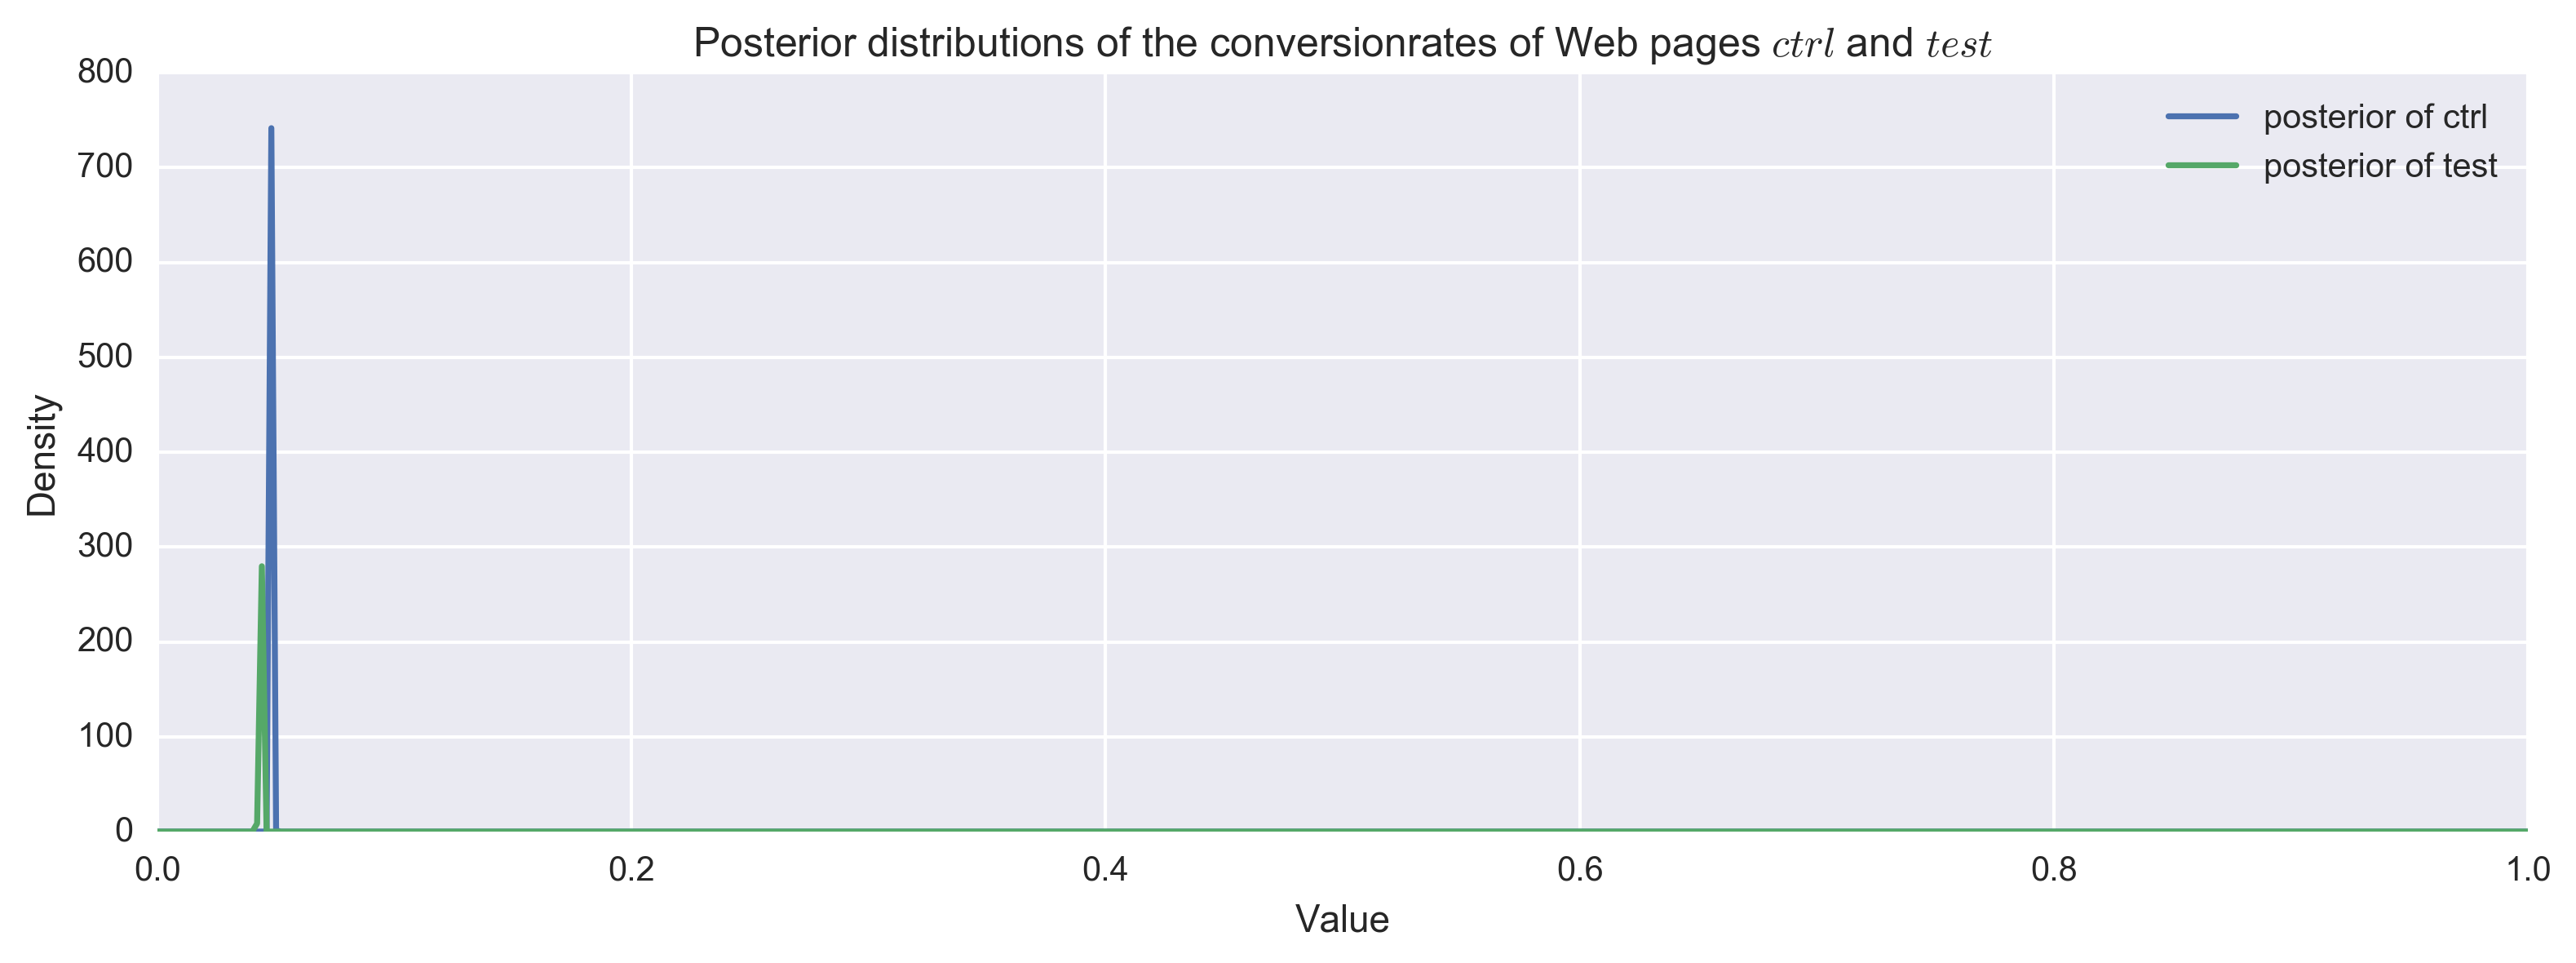

In [41]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 500)
plt.plot(x, posterior_ctrl.pdf(x), label='posterior of ctrl')
plt.plot(x, posterior_test.pdf(x), label='posterior of test')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the conversionrates of Web pages $ctrl$ and $test$")
plt.legend();

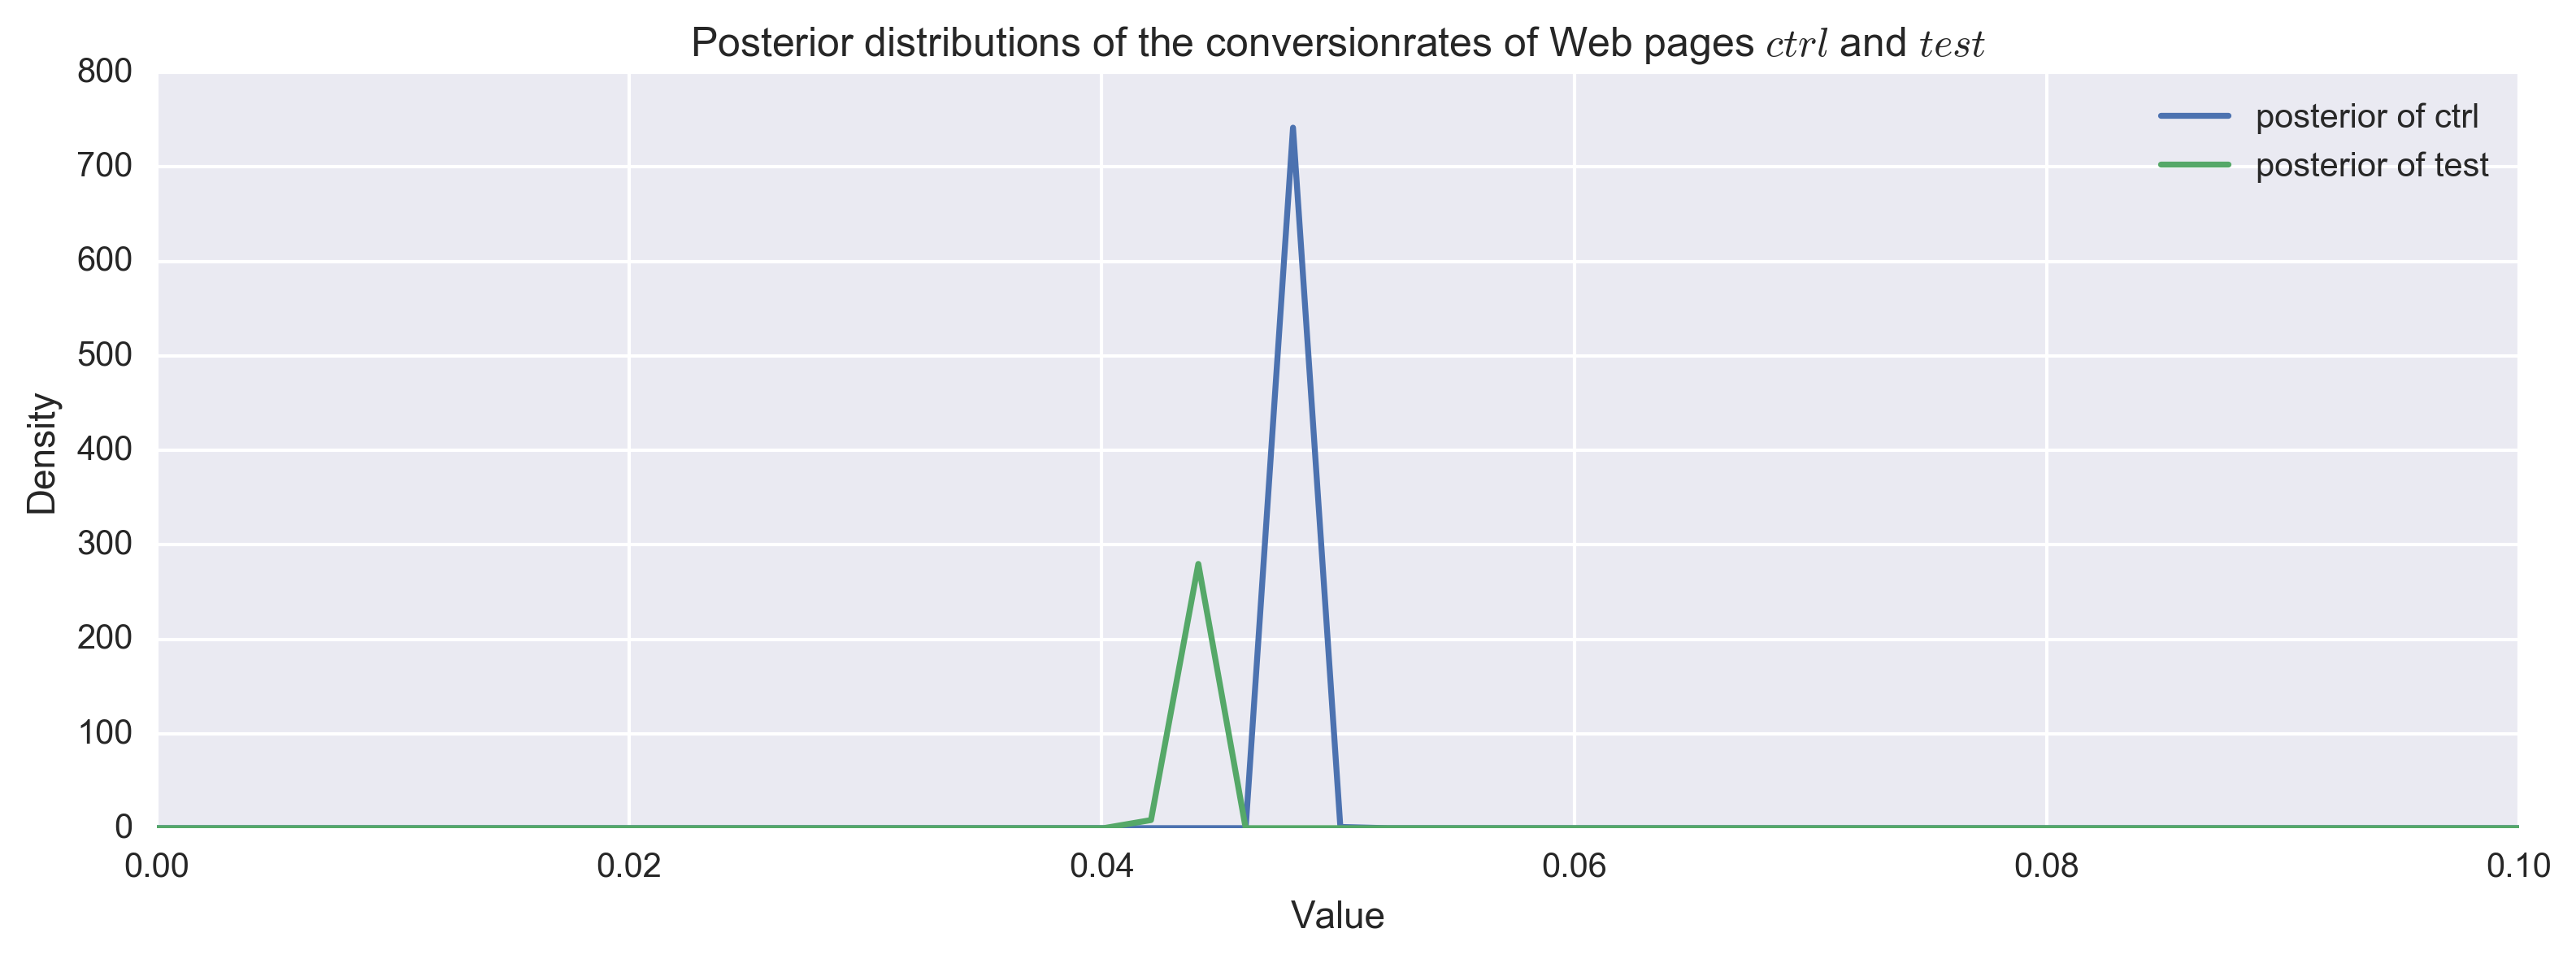

In [42]:
plt.plot(x, posterior_ctrl.pdf(x), label='posterior of ctrl')
plt.plot(x, posterior_test.pdf(x), label='posterior of test')
plt.xlim(0.00, 0.10)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the conversionrates of Web pages $ctrl$ and $test$")
plt.legend();

# other viz 

In [55]:
# df_test_few = df[df['test'] == 1][['conversion','date','user_id']]
# df_test_few = df_test_few.groupby(['date','conversion']).agg({"user_id": pd.Series.nunique}).reset_index()
# df_test_few.rename(columns={'user_id': 'tot_user_count'}, inplace=True)
# df_test_few = df_test_few.pivot(index='date', columns='conversion', values='tot_user_count')
# df_test_few['conv_rate'] = df_test_few['1']/df_test_few['0'] + df_test_few['1']

# df_control_few = df[(df['test'] == 0) & (df['country'].str.lower() != 'spain')][['conversion','date','user_id']]

df_test_few = df[df['test'] == 1][['conversion','date']]
df_test_few = df_test_few.groupby(['date']).mean().reset_index()
df_control_few = df[(df['test'] == 0) & (df['country'].str.lower() != 'spain')][['conversion','date']]
df_control_few = df_control_few.groupby(['date']).mean().reset_index()

merged_df = pd.merge(left=df_control_few,right=df_test_few, left_on='date', right_on='date')
merged_df.rename(columns={'conversion_x': 'conv_rate_ctrl','conversion_y': 'conv_rate_test'}, inplace=True)
merged_df['conv_rate_test_ctrl_ratio'] = merged_df['conv_rate_test']/merged_df['conv_rate_ctrl']

merged_df



,date,conv_rate_ctrl,conv_rate_test,conv_rate_test_ctrl_ratio
0,2015-11-30,0.051204,0.043878,0.856918
1,2015-12-01,0.046249,0.041371,0.894524
2,2015-12-02,0.048472,0.044216,0.912195
3,2015-12-03,0.049255,0.043898,0.891235
4,2015-12-04,0.047085,0.043459,0.922985


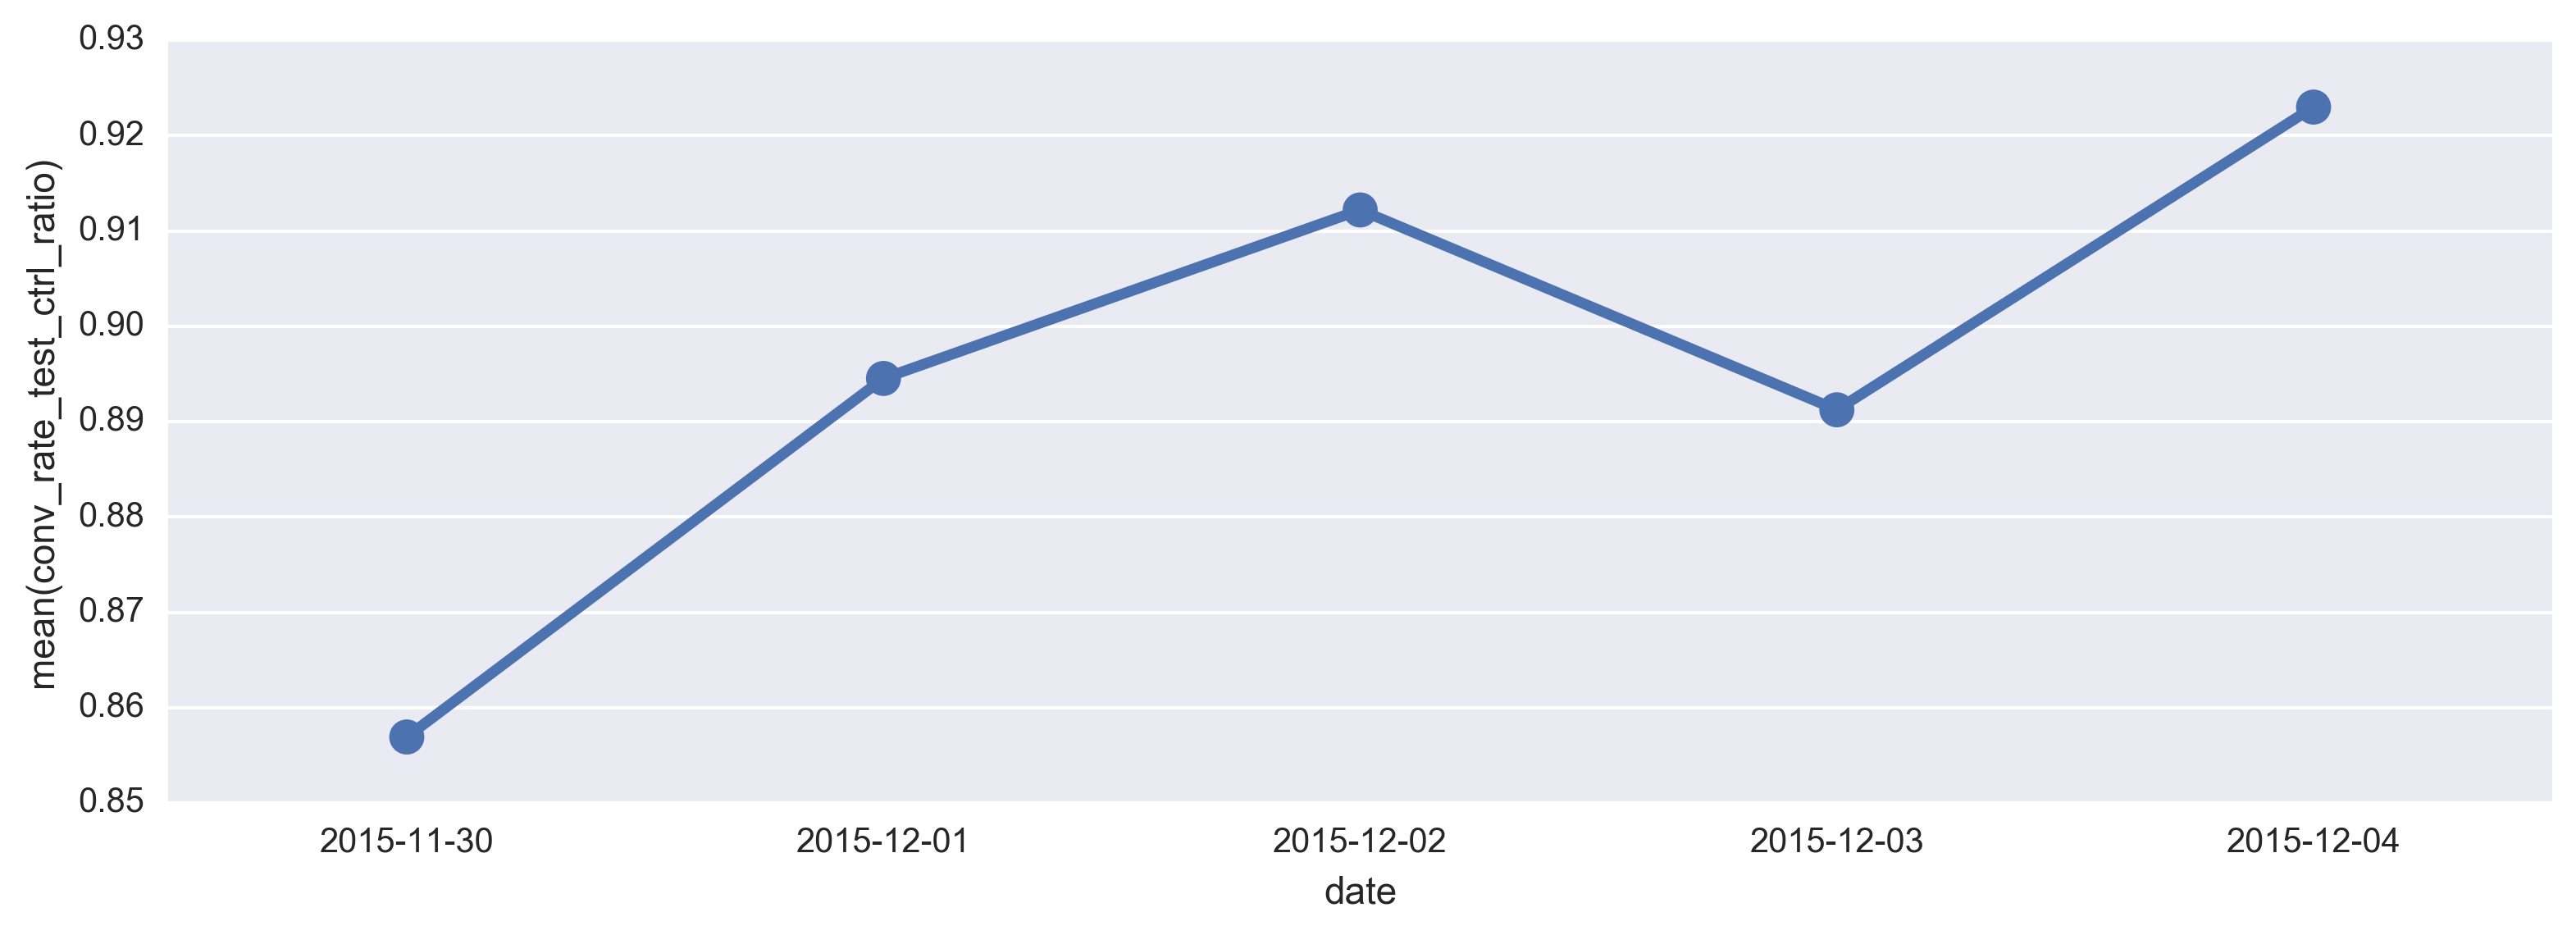

In [56]:
ax = sns.pointplot(x="date", y="conv_rate_test_ctrl_ratio", data=merged_df)

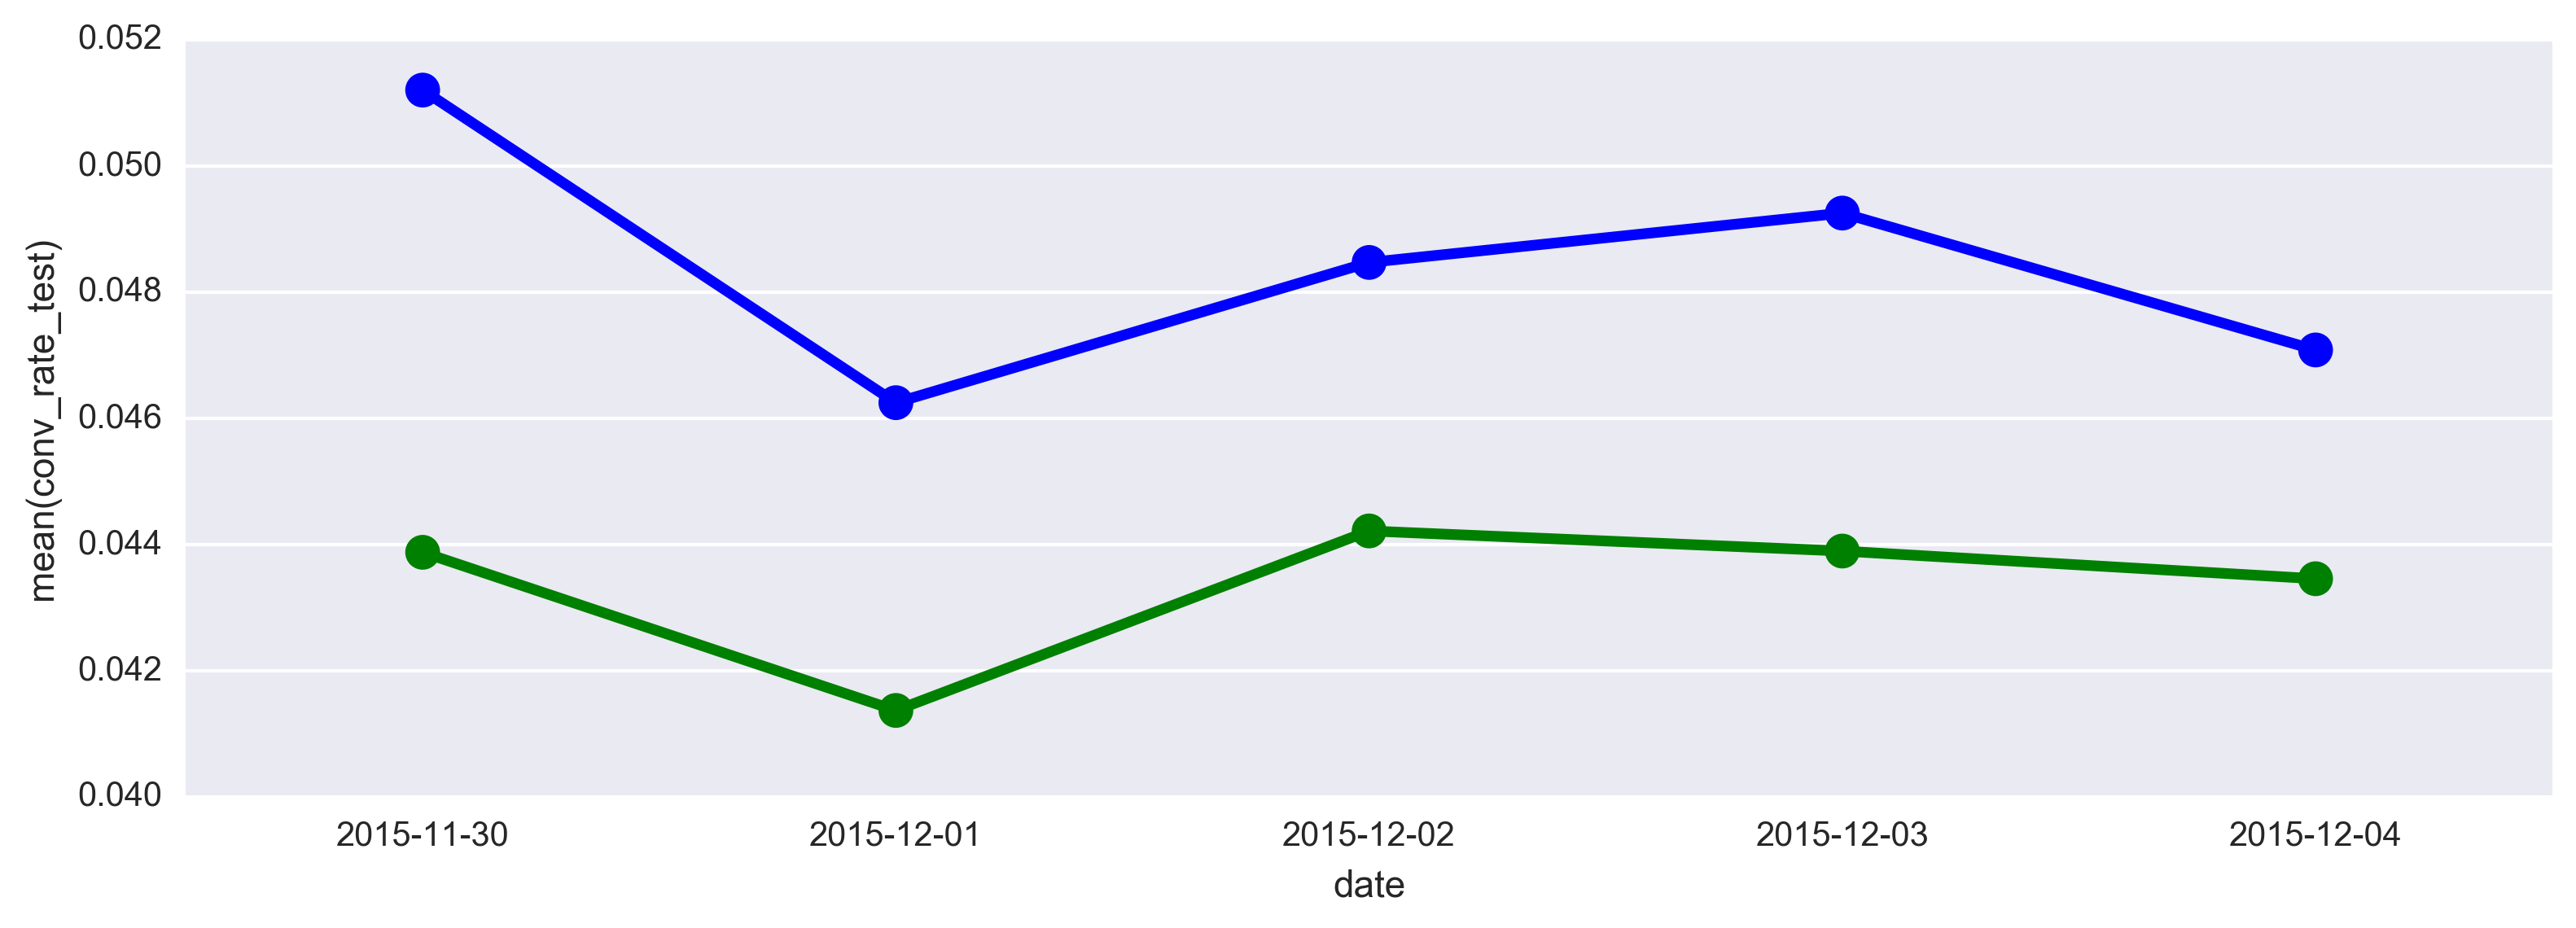

In [57]:
ax = sns.pointplot("date", y="conv_rate_ctrl", data=merged_df,color="blue")
ax = sns.pointplot("date", y="conv_rate_test", data=merged_df,color="green")

In [63]:
df_test_few = df[df['test'] == 1][['conversion','country']]
df_test_few = df_test_few.groupby(['country']).mean().reset_index().sort_values('conversion',ascending=False)
df_test_few


,country,conversion
4,Costa Rica,0.054738
10,Nicaragua,0.054177
2,Chile,0.051295
9,Mexico,0.051186
13,Peru,0.050604
3,Colombia,0.050571
11,Panama,0.049370
12,Paraguay,0.049229
5,Ecuador,0.048988
15,Venezuela,0.048978


In [62]:
df_control_few = df[(df['test'] == 0)][['conversion','country']]
df_control_few = df_control_few.groupby(['country']).mean().reset_index().sort_values('conversion',ascending=False)
df_control_few

,country,conversion
14,Spain,0.079719
6,El Salvador,0.053554
10,Nicaragua,0.052647
4,Costa Rica,0.052256
3,Colombia,0.052089
8,Honduras,0.050906
7,Guatemala,0.050643
16,Venezuela,0.050344
13,Peru,0.049914
9,Mexico,0.049495
